## Handwritten Digit Recognition - MNIST Dataset - CNN - Python/Keras

#### Objective

- Understand how CNN helps by implementing first with MLP and then moving onto CNN
- Get an idea about CNN implementation in Python / Keras

#### Gratitude

I am reading the book **'Deep Learning with Python' by Francois Chollet**. I sincerely express my gratitude to the author for the simplicity in explanation and explanation with code for CNN based solution for Handwritten Digit Recognition using MNIST dataset. 

I understood the code from the book and thought to write it myself in this notebook to build my understanding and intuition. I thought this way I can capture my inferences as I am reading the book and get an idea about how CNN works.

#### Key Design Considerations

This is a Multi-Class Classification problem (10 classes)
- Language: Python
- Deep Learning Package: Keras
- Dataset: MNIST dataset available with Keras
- Model: CNN

#### Key Results
**CNN based solution**
- Input (28x28x1 matrix) -> Conv(32 3x3 filters, relu) -> Maxpool(2x2) -> Conv(64 3x3 filters, relu) -> Maxpool(2x2) -> Conv(64 3x3 filters, relu) -> Flatten to a column vector for FCN -> FCN (64 outputs, relu) -> FCN (10 outputs, softmax)
- Number of parameters = **93322**
- Training Accuracy = **~99.4%**
- Test Accuracy = **~99.3%**

#### Conclusion
CNN has the advantage of using the spatial information in the image as compared to MLP, hence achieves better accuracy with reduced parameters.

#### Load Dataset

Load train and test datasets

In [3]:
# pip install keras.model

In [4]:
from keras.datasets import mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_labels.shape

(60000,)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
test_labels.shape

(10000,)

We have following with us:

<br>**Training Set**
- 60000 images
- Each image is of the shape 28 x 28 (rows x columns)
- 60000 labels defining the digit that corresponds to the respective image

<br>**Test Set**
- 10000 images
- Each image is of the shape 28 x 28 (rows x columns)
- 10000 labels defining the digit that corresponds to the respective image

#### Dataset Visualization

Let us visualize the handwritten digit images and labels for 0th training sample. We can see that the 0th image shows a handwritten 5 and the 0th label has the value 5. 

In [10]:
import matplotlib.pyplot as plt

In [11]:
# running this once shows the plts in gray scale as default
# https://stackoverflow.com/questions/3823752/display-image-as-grayscale-using-matplotlib
plt.gray()

<Figure size 640x480 with 0 Axes>

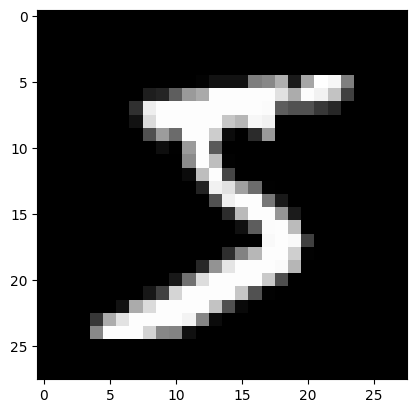

In [12]:
# if we do run the plt.gray() ... below code would have shown a color image
plt.imshow(train_images[0])

In [13]:
train_labels[0]

5

### CNN based solution

#### Define Model

In [14]:
from keras import models

In [15]:
from keras import layers

In [16]:
model_cnn = models.Sequential()

Layer Details:
- 2 dimensional Convolution Layer
- Number of filters/kernels = 32
- Filter/Kernel Size = 3x3
- Activation Function = relu (for non-linearity detection)
- Input Shape = 28x28 matrix with 1 channel (as image is gray scale, we have only 1 channel)

In [41]:
model_cnn.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))

ValueError: Input 0 of layer "conv2d_3" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 10)

Layer Details:
- Downsample the output from previous layer
- We will take the max value for a every 2x2 window ... moved over the input

In [18]:
model_cnn.add(layers.MaxPooling2D(2,2))

Layer Details:
- 2 dimensional Convolution Layer
- Number of filters/kernels = 64
- Filter/Kernel Size = 3x3
- Activation Function = relu (for non-linearity detection)

In [19]:
model_cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))

Layer Details:
- Downsample the output from previous layer
- We will take the max value for a every 2x2 window ... moved over the input

In [20]:
model_cnn.add(layers.MaxPooling2D(2,2))

Layer Details:
- 2 dimensional Convolution Layer
- Number of filters/kernels = 64
- Filter/Kernel Size = 3x3
- Activation Function = relu (for non-linearity detection)

In [21]:
model_cnn.add(layers.Conv2D(64, (3,3), activation='relu'))

Data at this stage is in matrix form. We will convert it to vector form to feed to a fully connected network (FCN).

In [22]:
model_cnn.add(layers.Flatten())

We will design for 64 outputs with activation function as relu (to learn non-linearity).

In [23]:
model_cnn.add(layers.Dense(64, activation = 'relu'))

This is the final layer. Hence, the outputs will be 10 corresponding to the 10 digits (0 to 9).
Activation Function chosen here is softmax to have a probabilistic output. 

In [24]:
model_cnn.add(layers.Dense(10, activation = 'softmax'))

In [25]:
model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

#### Data Preprocessing - Train and Test Images

In [26]:
train_images.shape

(60000, 28, 28)

CNN needs another dimension for the channel. Here as the image is gray scale it will be 1 channel. If we had color images, the channel value would have been 3 for the three channels - Red, Green and Blue. 

In [27]:
train_images_cnn = train_images.reshape(60000, 28, 28, 1)

In [28]:
train_images_cnn.shape

(60000, 28, 28, 1)

We need to change the element values from integer to decimal to have continuos values during prediction through the various layers. We will limit the values to the interval [0,1] so that the model treats each sample with equal weightage as the range of values for all samples will be fixed. We will do this by dividing the decimal values by 255 (gray scale values are from 0 to 255 ... 0 representing black to white).

In [29]:
train_images_cnn = train_images_cnn.astype('float32') / 255

In [30]:
test_images_cnn = test_images.reshape(10000, 28, 28, 1)

In [31]:
test_images_cnn = test_images_cnn.astype('float32') / 255

#### Data Preprocessing - Train and Test Labels

We will convert the labels to 10bit values. Only 1 of the bits of the 10bit value will be 1 corresponding to the location for the respective digit and rest all bits will be 0. This is required to match to the model's output layer expectation so that we can effectively train and test. 

In [32]:
from keras.utils import to_categorical

In [33]:
train_labels_cnn = to_categorical(train_labels)

In [34]:
test_labels_cnn = to_categorical(test_labels)

#### Define the optimizer function, loss function and metrics to be used for the model.
- Going ahead with the well known functions at this point in time
- Selected accuracy as the metrics to understand validation / test accuracy of the model

In [35]:
model_cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#### Train the Model

#### We will now train the model using train images and train labels. 
- We will use a batch size = 60.
- 1 epoch = 60000 / 60 = 1000 batches
- 1 epoch = 1 complete run of all train samples for training the model
- We will go for a total of 5 epochs = 5 complete run of the all train samples

In [36]:
model_cnn.fit(train_images_cnn, train_labels_cnn, epochs = 12, batch_size = 60)

Epoch 1/12


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.8641 - loss: 0.4219
Epoch 2/12
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9832 - loss: 0.0524
Epoch 3/12
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9903 - loss: 0.0310
Epoch 4/12
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9928 - loss: 0.0240
Epoch 5/12
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9937 - loss: 0.0200
Epoch 6/12
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9957 - loss: 0.0141
Epoch 7/12
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9965 - loss: 0.0108
Epoch 8/12
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9972 - loss: 0.0109
Epoch 9/12
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9977 - loss: 0.0066
Epoch 10/12
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9979 - loss: 0.0066
Epoch 11/12
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9977 - loss: 0.0068
Epoch 12/12
1000/1000 ━━

At this run, we got a training accuracy of **~99.4%**

#### Test the Model

We will now test model's performance with the test data.
- We predict the class for each of the 10000 test using the model.
- We will check the test accuracy.

In [37]:
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(test_images_cnn, test_labels_cnn)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9891 - loss: 0.0562


In [38]:
print('test accuracy:', (test_acc_cnn*100))

test accuracy: 99.22999739646912


At this run, we got a training accuracy of **~99.1%**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
This digit is probably a 1


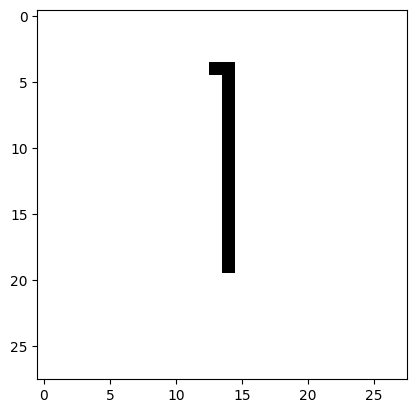

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your input image
image_name = 'digits/1.png'  # Set the path to your image file
img = cv2.imread(image_name, cv2.IMREAD_GRAYSCALE)
img = np.invert(img)
img = np.expand_dims(img, axis=-1)  # Add an extra dimension for the channel
img = img.reshape(1, 28, 28, 1)  # Reshape the input image to match the model's input shape

# Perform prediction
prediction = model_cnn.predict(img)
predicted_digit = np.argmax(prediction)
print(f'This digit is probably a {image_name[7]}')

# Display the input image
plt.imshow(np.squeeze(img), cmap=plt.cm.binary)
plt.show()


In [40]:
from keras.models import load_model
model_cnn.save('mnist_model.keras')